# LeNet

Lenet is most earlies convolutional neural network to predict hand writing dataset (MNIST). In this notebook I will reproduce the LeNet and useing different training set to play round with the LeNet

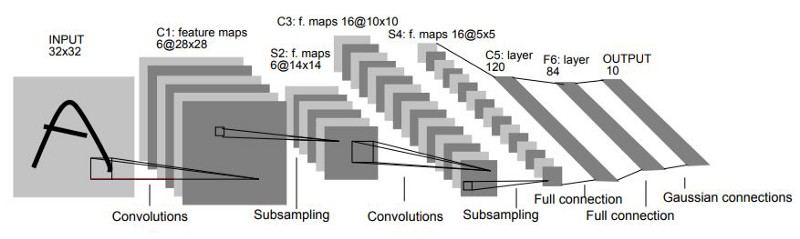

The structure of LeNet is that 
- Input: 28*28*1 (gray scale only have one channel, Color image have RGB three channel)
- Convolution Layer C1 (kernal size=(5,5),padding =2, feature_in =1 feature_out = 6)
- Sigmoid
- Average Pool Layer S2 (kernal size= (2,2),stride =2)
- Convolution Layer C3 (kernal size=(5,5), feature_in =6 feature_out = 10)
- Sigmoid
- Average Pool Layer S4 (kernal size= (2,2),stride =2)
- Flatten
- Linear(n,120)
- Sigmoid
- Linear(120,84)
- Sigmoid
- Linear(84,10)  10 class of output



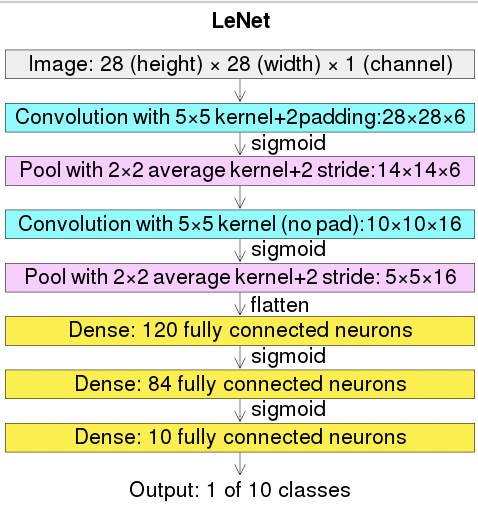

In [1]:
# 
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch
from torch import nn
from torch.utils.data import DataLoader

In [2]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.C1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=(5,5),padding=2)
        self.S2=nn.AvgPool2d(kernel_size=(2,2),stride=2)
        self.C3=nn.Conv2d(in_channels=6,out_channels=16,kernel_size=(5,5))
        self.S4=nn.AvgPool2d(kernel_size=(2,2),stride=2)
        self.linear1=nn.Linear(400,120)
        self.linear2=nn.Linear(120,84)
        self.linear3=nn.Linear(84,10)

        # flatten Layer
        self.flatten=nn.Flatten()
        
    def forward(self,x):
        x=self.C1(x)
        x=nn.Sigmoid()(x)
        x=self.S2(x)
        x=self.C3(x)
        x=nn.Sigmoid()(x)
        x=self.S4(x)
        # Flatten
        x=self.flatten(x)
        # Linear Layers with sigmoid activation function
        x=self.linear1(x)
        x=nn.Sigmoid()(x)
        x=self.linear2(x)
        x=nn.Sigmoid()(x)
        x=self.linear3(x)
        return x

# MNIST dataset

In [3]:
# transform data into tensor
transform=transforms.Compose([torchvision.transforms.ToTensor()])

In [4]:
# Get the MNIST train dataset and test dataset
train_dataset=datasets.MNIST('./data', train=True, download=True,transform=transform)
train_dl = DataLoader(train_dataset,batch_size=128, shuffle=True)
test_dataset=datasets.MNIST('./data', train=False, download=True,transform=transform)
test_dl = DataLoader(test_dataset,batch_size=128, shuffle=True)
print("number of image in train: ",len(train_dataset))
print("number of image in test: ",len(test_dataset))

number of image in train:  60000
number of image in test:  10000


In [5]:
x,y=next(iter(train_dl))
print("x: ",x.shape) 
print("y: ",y.shape)

x:  torch.Size([128, 1, 28, 28])
y:  torch.Size([128])


In [6]:
model = LeNet()
model

LeNet(
  (C1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (S2): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (C3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (S4): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (linear1): Linear(in_features=400, out_features=120, bias=True)
  (linear2): Linear(in_features=120, out_features=84, bias=True)
  (linear3): Linear(in_features=84, out_features=10, bias=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

In [32]:
model=LeNet()
optimizer= torch.optim.SGD(model.parameters(),lr=0.5)

In [40]:
def train_one_epoch(train_dl,model,optimizer):
    train_loss=0
    for X,y in train_dl:
        model.train()
        y_pred = model(X)
        # update model and parameter
        optimizer.zero_grad()
        loss = F.cross_entropy(y_pred,y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * X.size(0)
    train_loss = train_loss / len(train_dl.dataset)
    print(train_loss)



In [42]:
model=LeNet()
optimizer= torch.optim.SGD(model.parameters(),lr=0.9)
for i in range(100):
    train_one_epoch(train_dl,model,optimizer)

2.3105215274810793
2.303490699005127
2.3029590320587157
2.30309337793986
2.3032366616566975
2.3027376730600992
2.3030516966501873
2.30255079536438
2.302604557418823
2.3027164684295656
2.302686592610677
2.301808686319987


KeyboardInterrupt: 